In [1]:
import numpy as np

In [2]:
import string
from typing import Dict

generic_topics = list(string.ascii_uppercase)

class UniformPerson:
    def __init__(self):
        self.rhetoric_ability = np.random.rand()
        self.beliefs: Dict[str, float] = dict(zip(generic_topics, np.random.uniform(-1.0, 1.0, size=len(generic_topics))))
    def __repr__(self):
        return f'UniformPerson(rhetoric_ability={self.rhetoric_ability}, beliefs={self.beliefs}'

In [3]:
UniformPerson()

UniformPerson(rhetoric_ability=0.804938609272955, beliefs={'A': 0.44811090733124037, 'B': 0.8934113151768162, 'C': -0.7157341543638891, 'D': 0.09070980209085944, 'E': -0.028369372633911594, 'F': 0.0390291014113926, 'G': 0.802331840234068, 'H': -0.042389227927336126, 'I': -0.5499167192189014, 'J': 0.4954973405501051, 'K': 0.8848747910534733, 'L': -0.7080761352911351, 'M': -0.4275707113788667, 'N': -0.517303424096182, 'O': -0.4722750354911711, 'P': 0.448906357863744, 'Q': -0.38985103702805923, 'R': 0.8165730603718186, 'S': -0.9118797553703901, 'T': 0.07322033941276218, 'U': -0.6926107056327009, 'V': 0.9196299524332996, 'W': 0.8222859032976921, 'X': -0.5293250397905129, 'Y': -0.05506328623062484, 'Z': -0.7261885007720743}

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def display(belief_distribution):
    x = [i for i in range(len(generic_topics))]
    y = [belief_distribution[T] for T in generic_topics]
    plt.scatter(x, y)    

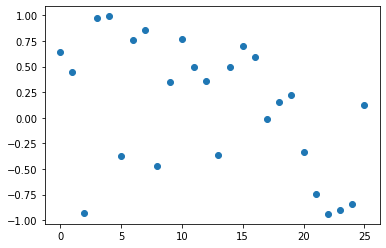

In [5]:
p = UniformPerson()

display(p.beliefs)

In [6]:
import itertools 

def population(SomePerson, N):
    return [SomePerson() for i in range(N)]

In [15]:
def flip(success_threshold):
    return np.random.rand() < success_threshold

def choose_topic(topics=generic_topics):
    topic_idx = np.random.choice(len(topics))
    return topics[topic_idx]

def rhetoric_wins(pair):
    u, v = pair
    return flip(u.rhetoric_ability)
        
def update(sophist, listener, topic, lr=0.5):
    direction = -1 if sophist.beliefs[topic] < 0 else 1
    listener.beliefs[topic] += direction * sophist.rhetoric_ability * lr 
    if listener.beliefs[topic] > 1:
        listener.beliefs[topic] = 1
    if listener.beliefs[topic] < -1:
        listener.beliefs[topic] = -1
    

In [16]:
def average_beliefs(population):
    averages = np.mean(np.array([np.array(list(p.beliefs.values())) for p in population]), axis=0)
    return dict(zip(generic_topics, averages))

In [17]:
N = 1000
num_events = N*N

pop = population(UniformPerson, N)

In [18]:
choices = np.random.choice(N, 2*num_events)
topic_sequence = np.random.choice(len(generic_topics), 2*num_events)

In [19]:
pairs = [(choices[i], choices[i+1]) for i in range(len(choices)-1) if choices[i] != choices[i+1]]

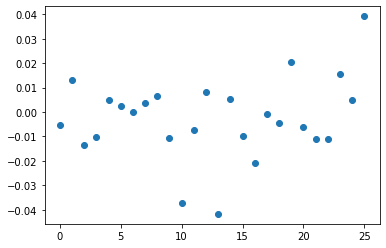

In [20]:
before = average_beliefs(pop)
display(before)

In [21]:
for i, pair_index in enumerate(choices):
    i, j = pairs[pair_index]
    topic = generic_topics[topic_sequence[i]]
#     if rhetoric_wins((pop[i], pop[j])):
    update(pop[i], pop[j], topic)

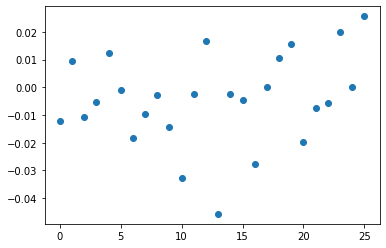

In [22]:
display(average_beliefs(pop))